In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

In [2]:
df = pd.read_csv('data.csv')
print(df[:5])

          Date     Open      High      Low     Close  Shares Traded  \
0  13-Apr-2021  14364.9  14528.90  14274.9  14504.80      588666016   
1  15-Apr-2021  14522.4  14597.55  14353.2  14581.45      556851211   
2  16-Apr-2021  14599.6  14697.70  14559.0  14617.85      568568743   
3  19-Apr-2021  14306.6  14382.30  14191.4  14359.45      503142904   
4  20-Apr-2021  14526.7  14526.95  14207.3  14296.40      456704716   

   Turnover (Rs. Cr)  
0           40846.57  
1           40177.25  
2           36653.65  
3           34751.95  
4           34687.11  


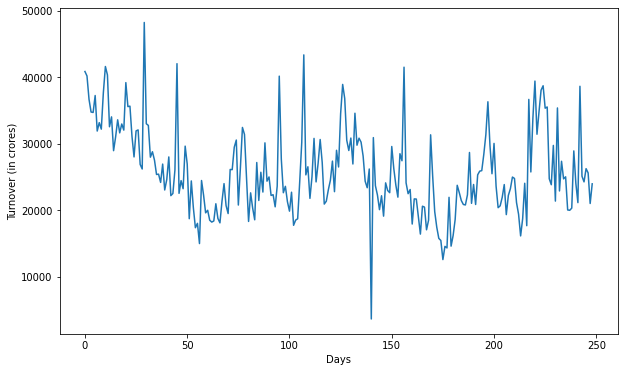

In [3]:
data = df.iloc[:,6].values
plt.figure(figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Turnover (in crores)')
plt.plot(data)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])  
mask = (df['Date'] == '2022-2-14')
print(df.loc[mask])     # index for the date 18-Apr-2019
print('--------------------------------------------')
train = data[:205]
test = data[175:]

          Date      Open     High       Low    Close  Shares Traded  \
209 2022-02-14  17076.15  17099.5  16809.65  16842.8      305510740   

     Turnover (Rs. Cr)  
209           24976.16  
--------------------------------------------


In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

In [6]:
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train[:2])

(175, 30) (175,)
[[0.83461451 0.81960156 0.74056672 ... 0.52116272 0.50581692 1.        ]
 [0.81960156 0.74056672 0.69791133 ... 0.50581692 1.         0.6584372 ]
 [0.74056672 0.69791133 0.69645696 ... 1.         0.6584372  0.65276708]
 ...
 [0.30969025 0.27182705 0.26462967 ... 0.48980853 0.59207942 0.4480315 ]
 [0.27182705 0.26462967 0.20030047 ... 0.59207942 0.4480315  0.37539082]
 [0.26462967 0.20030047 0.24486311 ... 0.4480315  0.37539082 0.38164412]]
[0.6584372  0.65276708]


In [9]:
# Training LSTM model

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
# LSTM layer
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
#  Dense layer
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 50, batch_size = 4)

Epoch 1/50
44/44 [==============================] - 3s 21ms/step - loss: 0.2647
Epoch 2/50
44/44 [==============================] - 1s 19ms/step - loss: 0.0247
Epoch 3/50
44/44 [==============================] - 1s 21ms/step - loss: 0.0153
Epoch 4/50
44/44 [==============================] - 1s 19ms/step - loss: 0.0152
Epoch 5/50
44/44 [==============================] - 1s 19ms/step - loss: 0.0149
Epoch 6/50
44/44 [==============================] - 1s 17ms/step - loss: 0.0148
Epoch 7/50
44/44 [==============================] - 1s 21ms/step - loss: 0.0146
Epoch 8/50
44/44 [==============================] - 1s 21ms/step - loss: 0.0143
Epoch 9/50
44/44 [==============================] - 1s 25ms/step - loss: 0.0141
Epoch 10/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0139
Epoch 11/50
44/44 [==============================] - 1s 23ms/step - loss: 0.0139
Epoch 12/50
44/44 [==============================] - 1s 19ms/step - loss: 0.0137
Epoch 13/50
44/44 [==================

In [10]:
X_test = []
y_test = []

for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(44, 30)
(175, 30, 1)


6/6 [==============================] - 0s 4ms/step


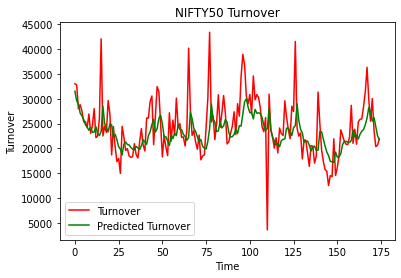

In [12]:
predicted = model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-175:]), color = 'red', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NIFTY50 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

2/2 [==============================] - 0s 14ms/step


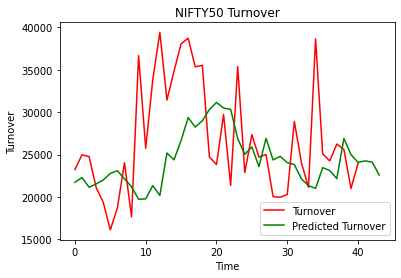

In [13]:
predicted = model.predict(X_test)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(test[-41:]), color = 'red', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NIFTY50 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()